In [173]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm

### (a)

In [174]:
def Q_fkt(u: float):
    return -np.log(u)

def Y_fkt(q: float, v: float):
    return v * np.exp(q+0.5)

def check_fkt(q: float):
    return np.exp((-q**2)/2)

def zufallszahlen(N):
    X_values = []
    Y_values = []
    k = 0
    
    while k < N:
        U = random.uniform(0, 1)
        V = random.uniform(0, 1)
        
        # Funktionen berechnen:
        Q = Q_fkt(u=U)
        Y = Y_fkt(q=Q, v=V)
        
        if Y < check_fkt(q=Q):
            k = k + 1
            X_values.append(Q)
            Y_values.append(Y)
        
    return X_values, Y_values

### (b)

In [175]:
zz = zufallszahlen(50)

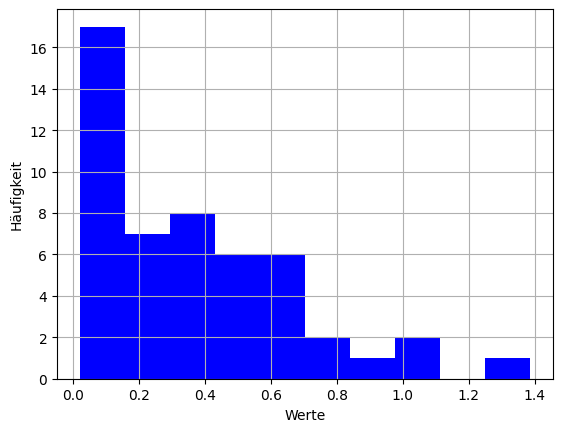

In [176]:
plt.hist(zz[0], color='blue')
plt.xlabel('Werte')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

### (c)

In [177]:
def empirische_VF(data):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    y = np.arange(1, n + 1) / n
    return sorted_data, y

def theoretische_VF(x: float):
    if x > 0:
        return 2 * norm.pdf(x) - 1
    else:
        raise ValueError("Only values greater 0 are allowed!")
    
F_Dach = empirische_VF(zz[0])
x_values = np.linspace(0.01, 1.7, 50)
F = [theoretische_VF(x) for x in x_values]


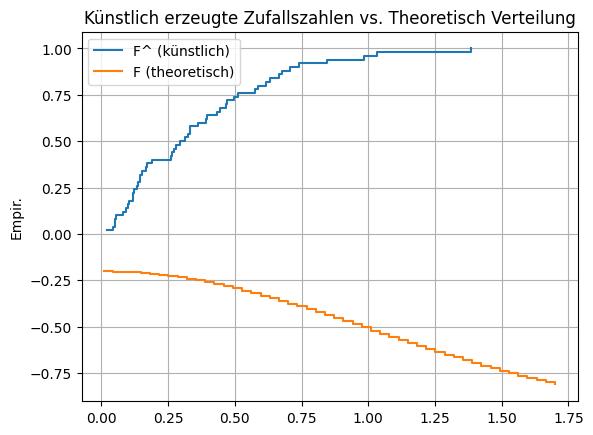

In [178]:
plt.title("Künstlich erzeugte Zufallszahlen vs. Theoretisch Verteilung")
plt.step(F_Dach[0], F_Dach[1], where='post', label="F^ (künstlich)")
plt.step(x_values, F, where='post', label='F (theoretisch)')
plt.legend()
plt.ylabel("Empir.")
plt.grid()
plt.show()

### (d)

In [179]:
n = 100_000
x, y = zufallszahlen(n)

### (e)

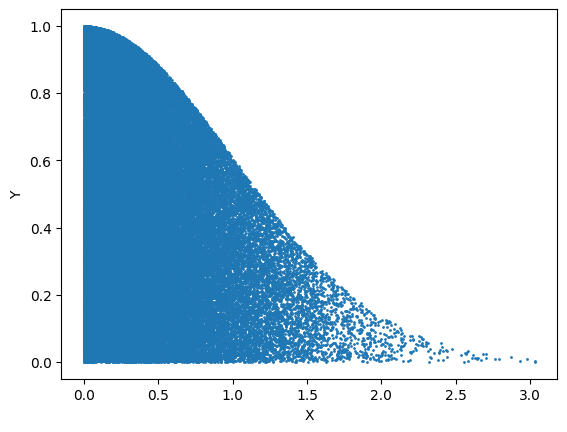

In [180]:
plt.scatter(x, y, s=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### (f)

In [181]:
def winkel_funktion(x, y):
    phiis = []
    S = []
    for xi, yi in zip(x, y):
        
        Si = xi**2 + yi **2
        phii = math.asin((xi/np.sqrt(Si)))
        phiis.append(phii)
        S.append(Si)
        
    return S, phiis
    

In [182]:
S, ph = winkel_funktion(x, y)

### (g)

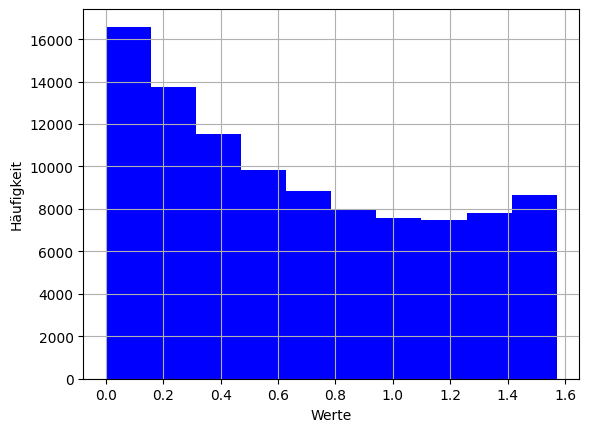

In [183]:
plt.hist(ph, color='blue')
plt.xlabel('Werte')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

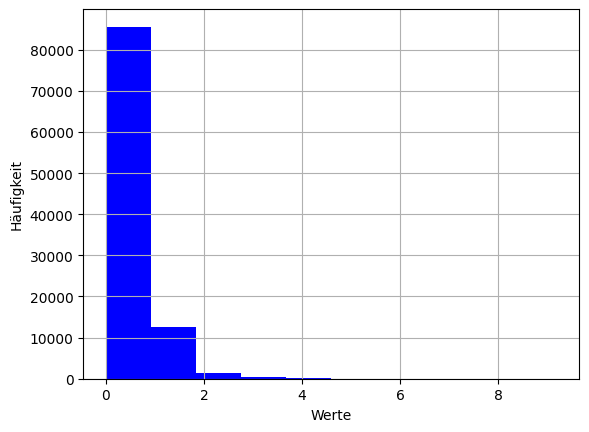

In [184]:
plt.hist(S, color='blue')
plt.xlabel('Werte')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

### (h)

In [185]:
S_Dach = empirische_VF(S)

def exponential_VF(x, lamb = 0.5):
    if x >= 0:
        return 1 - np.exp(-lamb*x)
    else:
        raise ValueError("Only values greater or equal 0")
    
x_values = np.linspace(0, 7, n)
exp_val = [exponential_VF(x) for x in x_values]

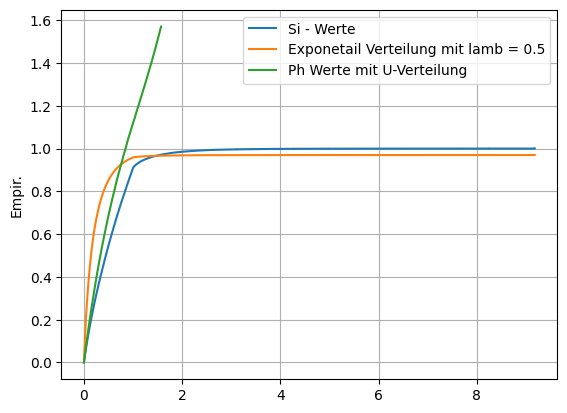

In [186]:
plt.step(S_Dach[0], S_Dach[1], where='post', label="Si - Werte")
plt.step(S_Dach[0], exp_val, where='post', label="Exponetail Verteilung mit lamb = 0.5")
plt.step(np.sort(ph), np.sort(np.random.uniform(0, np.pi/2, n)), label="Ph Werte mit U-Verteilung" )
plt.legend()
plt.ylabel("Empir.")
plt.grid()
plt.show()